In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Load the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
#Look at top 5 values
dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\venu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


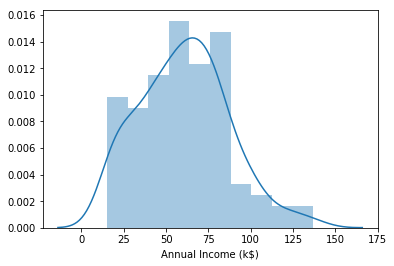

In [21]:
#Select only Annual Income and Spending Score
X = dataset.iloc[:, [3,4]].values

import seaborn as sns
sns.distplot(dataset['Annual Income (k$)'])

In [5]:
#Import KMeans clustering
from sklearn.cluster import KMeans

In [6]:
#List to store withing cluster sum of square
wcss = []

In [7]:
#Fit the KMeans algorithm with different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)sa

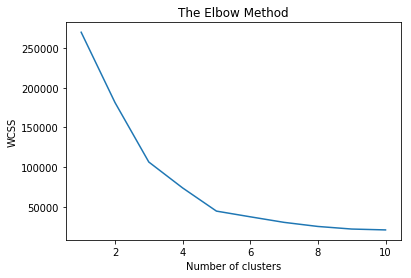

In [8]:
#Plot the wcss values
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

In [11]:
#Fit the KMeans clustering algo with k = 5
kmeans =  KMeans(n_clusters = 5, 
                    init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state=0)

In [12]:
#Make prediction
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [19]:
X[y_kmeans==0]

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

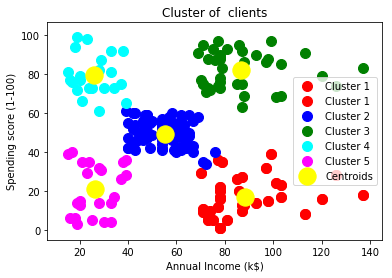

In [22]:
#Visualising the custers
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], 
            s = 100, c ='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], 
            s = 100, c ='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], 
            s = 100, c ='green', label = 'Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], 
            s = 100, c ='cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], 
            s = 100, c ='magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 300, c ='yellow', label = 'Centroids')
plt.title('Cluster of  clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()